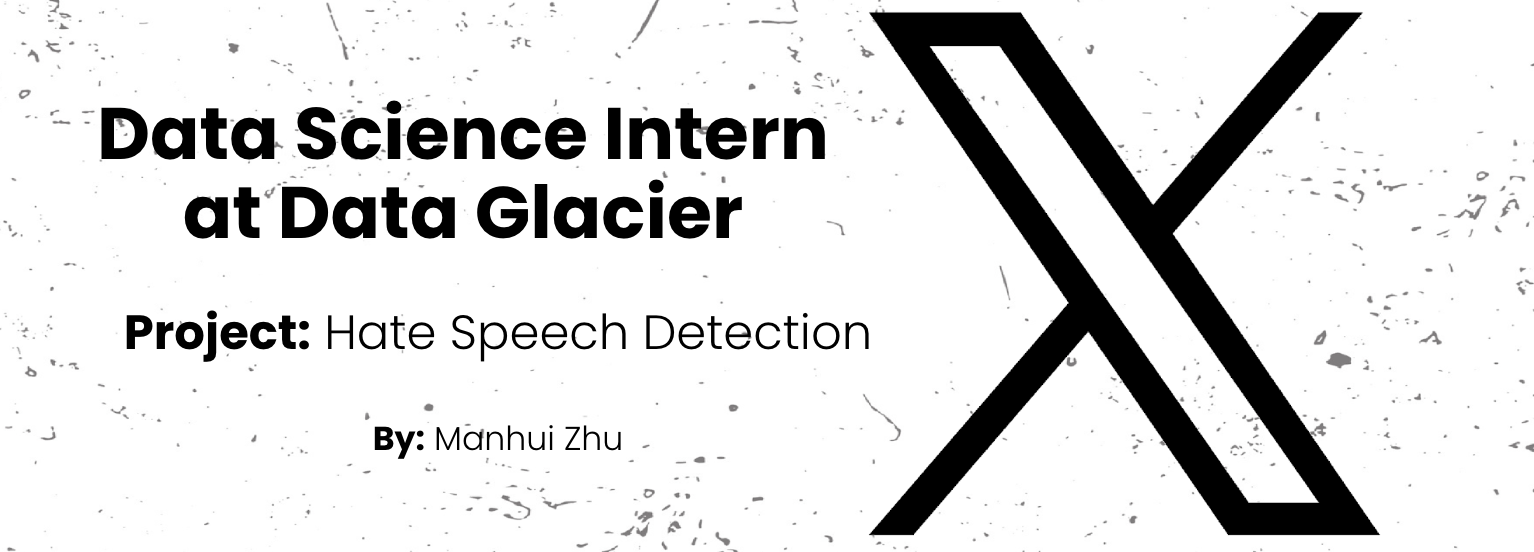

# Problem Statement

The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, I will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. A model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, I will use the Twitter tweets to identify tweets containing  Hate speech.



$\rule{800pt}{20pt}$

# 1. Import libraries and datadet

## 1.1 Import libraries and packages

In [123]:
# Load All Packages

# Basic
import os
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
import re
import string
import nltk

# EDA
from itertools import chain
from collections import Counter
from wordcloud import WordCloud
from sklearn.utils import resample

## 1.2 Import Dataset

In [3]:
# Navigate to Directory
drive.mount('/content/drive')

os.chdir("/content/drive/MyDrive/Data Glacier")

Mounted at /content/drive


## 1.3 Read the data

In [87]:
filepath = './Week 7-13: Hate Speech Detection Project (NLP)/'

speech = pd.read_csv(filepath + 'hate_speech.csv')

In [88]:
speech.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [89]:
speech.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


## 1.3 Data information: number of columns and observatons, data type

In [25]:
speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [26]:
speech.shape

(31962, 3)

There are 31962 tweets and 3 variables in the dataset.

## 1.4 Check the missing values and duplicated values

In [27]:
speech.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [28]:
speech.duplicated().sum()

0

There is no missing values in our dataset, and each row has unique value.

$\rule{800pt}{20pt}$

# 2. Data Preprocessing

## 2.1 Text Cleaning

We can use the Regular Expression (`re`) package to help remove URLs and user mention and other special characters.

*   **Lowercasing**: Convert text to lowercase to ensure uniformity
*   **Remove User Mentions**: Strip out Twitter handles (eg. `@user`)
*   **Remove URLs**: Strip out URLs from the tweets
*   **Remove Special Characters**: Remove punctuation, special characters
*   **Remove leading and trailing whitespace**




In [94]:
def clean_tweet(tweet):
  '''Text Cleaning'''
  tweet = tweet.lower()      # lowercase
  tweet = re.sub(r'@[\w]*', '', tweet)     # remove @user
  # [\w]: a character class that matches any alphanumeric character
  # or underscore (equivalent to [A-Za-z0-9_])
  # *: a quantifier that matches zero or more occurrences of the preceding character class.

  tweet = re.sub(r'http\S+', '', tweet)    # remove URLs
  # http: Matches the literal string "http".
  # \S: Matches any non-whitespace character.
  # +: Quantifier that matches one or more of the preceding token (non-whitespace characters)

  special_chars = r'[^a-zA-Z0-9\s]'  # Keep only letters, digits, and whitespace
  tweet = re.sub(special_chars, '', tweet)     # remove special characters

  tweet = tweet.strip()     # Remove leadind and trailing whitespace

  return tweet


In [95]:
speech['tweet'] = speech['tweet'].apply(clean_tweet)

## 2.2 Remove stop words

Remove words that appeared frequently like 'and', 'is', 'the' but may not contribute to the meaning of the sentence. We use the `nltk` library and download thr stop words list to remove stop words.

In [96]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# get the list of enligh stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

In [98]:
speech['nostop_tweet'] = speech['tweet'].apply(lambda x: ' '.join(remove_stop_words(x.split())))

In [99]:
speech.head()

,id,label,tweet,nostop_tweet
0,1,0,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks for lyft credit i cant use cause they d...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,model i love u take with u all the time in ur,model love u take u time ur
4,5,0,factsguide society now motivation,factsguide society motivation


## 2.3 Tokenization

Split tweets into individual words (tokens)

In [100]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

speech['tokenized_tweet'] = speech['nostop_tweet'].apply(word_tokenize)
speech.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,label,tweet,nostop_tweet,tokenized_tweet
0,1,0,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,thanks for lyft credit i cant use cause they d...,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0,model i love u take with u all the time in ur,model love u take u time ur,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide society now motivation,factsguide society motivation,"[factsguide, society, motivation]"


## 2.4 Lemmatization

Reduce words to their base or root form by considering the context meaning of the word. It uses a dictionary-based approach to return the lemma, which is the base form of a word.

In [101]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

speech['tweet_clean_words'] = speech['tokenized_tweet'].apply(lemmatize_words)

In [103]:
speech.head()

,id,label,tweet,nostop_tweet,tokenized_tweet,tweet_clean_words
0,1,0,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,thanks for lyft credit i cant use cause they d...,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,...","[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]","[bihday, majesty]"
3,4,0,model i love u take with u all the time in ur,model love u take u time ur,"[model, love, u, take, u, time, ur]","[model, love, u, take, u, time, ur]"
4,5,0,factsguide society now motivation,factsguide society motivation,"[factsguide, society, motivation]","[factsguide, society, motivation]"


# 3. EDA (Exploratory Data Analysis)

## 3.1 Number of words in tweet & number of stop words in tweet

In [133]:
# Number of words in tweet

df = pd.DataFrame()

df['tweet'] = speech['tweet']
df['word_count'] = speech['tweet'].apply(lambda x: len(str(x).split(" ")))

In [134]:
# Number of stop words in tweet

df['stopwords_count'] = df['tweet'].apply(lambda x:
                                          len([x for x in x.split() if x in stop_words]))
df.head()

,tweet,word_count,stopwords_count
0,when a father is dysfunctional and is so selfi...,19,10
1,thanks for lyft credit i cant use cause they d...,20,4
2,bihday your majesty,3,1
3,model i love u take with u all the time in ur,14,5
4,factsguide society now motivation,7,1


In [135]:
df['word_count'].max()

43

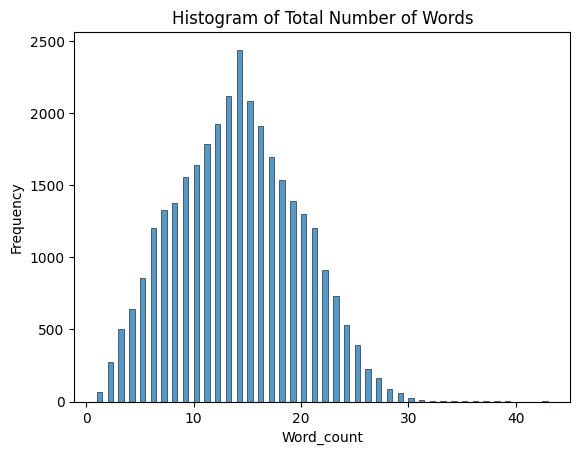

In [107]:
# Histogram of total number of words

sns.histplot(df['word_count'])
plt.title('Histogram of Total Number of Words')
plt.xlabel('Word_count')
plt.ylabel('Frequency')
plt.show()

## 3.2 The most frequent words in the whole dataset

In [139]:
# Flatten the list of tokenized tweets
all_tokens = list(chain.from_iterable(speech['tokenized_tweet']))

# Count word frequencies
word_counts = Counter(all_tokens)

# Top 10 most frequent words
word_counts.most_common(10)

[('love', 2725),
 ('day', 2256),
 ('happy', 1691),
 ('amp', 1602),
 ('im', 1157),
 ('u', 1143),
 ('life', 1127),
 ('time', 1126),
 ('like', 1052),
 ('today', 1005)]

<ipython-input-109-e8c6eeaf83cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'frequency', y = 'word',


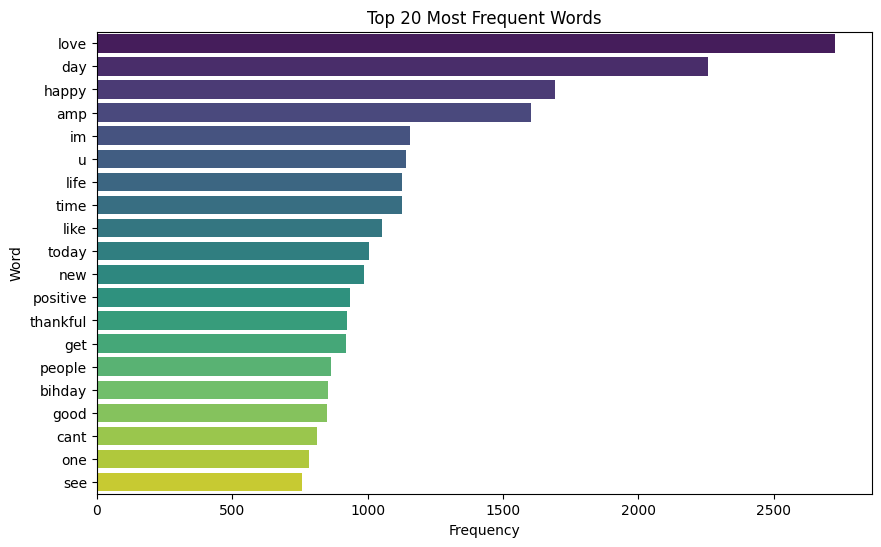

In [109]:
word_freq = pd.DataFrame(word_counts.most_common(20),
                         columns = ['word', 'frequency'])

plt.figure(figsize = (10, 6))
sns.barplot(x = 'frequency', y = 'word',
            data = word_freq,
            palette = 'viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## 3.3 The most frequent words in hate tweets and non-hate tweets

In [110]:
df = speech[['id', 'label', 'tokenized_tweet']]

group_df = df.groupby('label')['tokenized_tweet']

In [111]:
# Create a dictionary to store word counts for each label
word_counts_by_label = {}

for label, tweets in group_df:
    all_tokens = list(chain.from_iterable(tweets))
    word_counts = Counter(all_tokens)
    word_counts_by_label[label] = word_counts

<ipython-input-112-2c0d3af39db3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data = nonhate_df,
<ipython-input-112-2c0d3af39db3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data = hate_df,


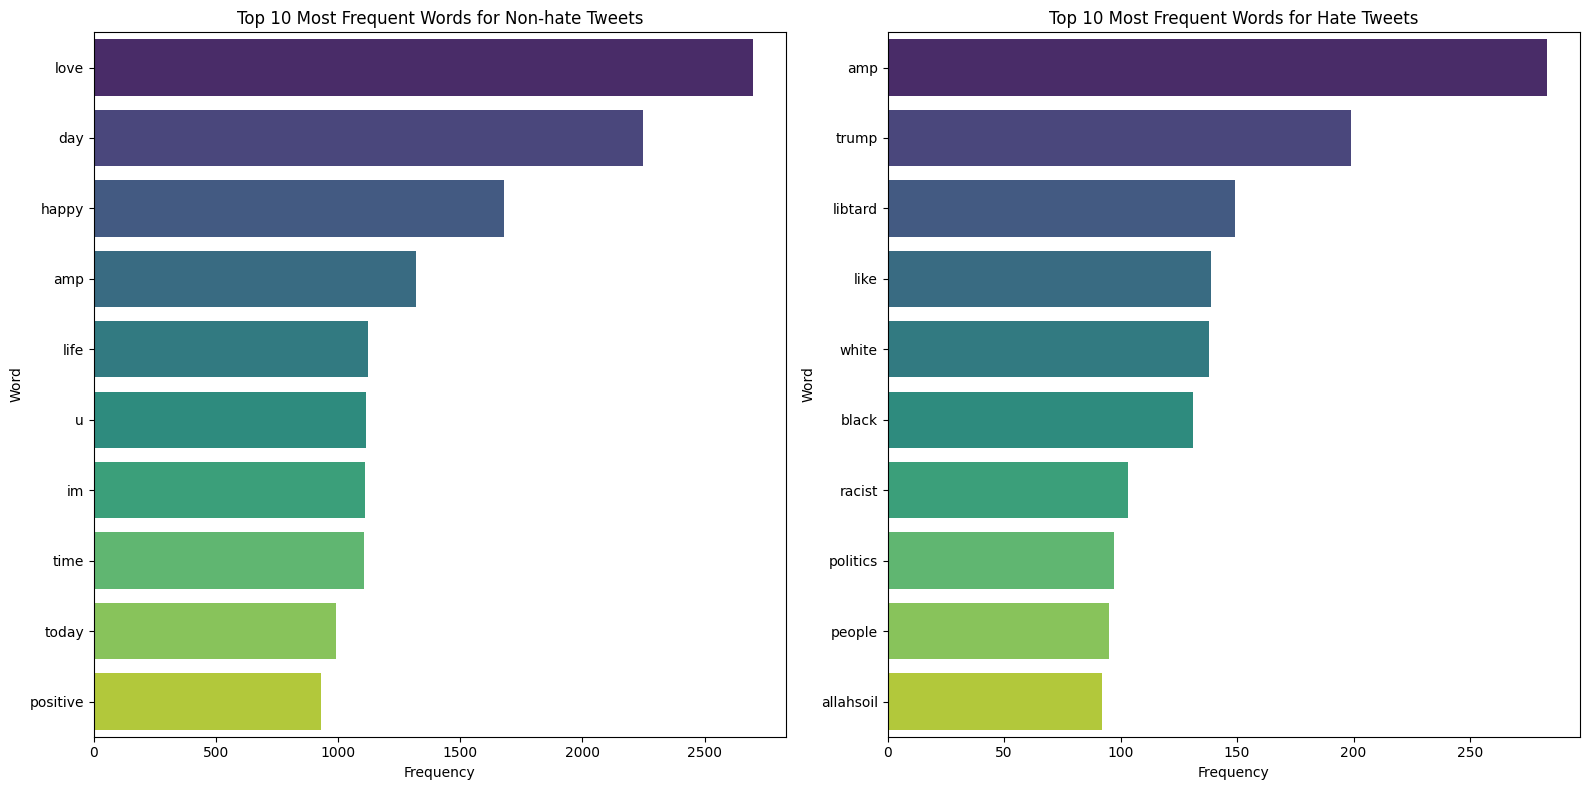

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# top 10 frequent words in non-hate tweets
nonhate_top_words = word_counts_by_label[0].most_common(10)
nonhate_df = pd.DataFrame(nonhate_top_words, columns=['word', 'frequency'])
sns.barplot(x='frequency', y='word', data = nonhate_df,
            palette='viridis', ax=axes[0])
axes[0].set_title(f'Top 10 Most Frequent Words for Non-hate Tweets')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# top 10 frequent words in hate tweets
hate_top_words = word_counts_by_label[1].most_common(10)
hate_df = pd.DataFrame(hate_top_words, columns=['word', 'frequency'])
sns.barplot(x='frequency', y='word', data = hate_df,
            palette='viridis', ax=axes[1])
axes[1].set_title(f'Top 10 Most Frequent Words for Hate Tweets')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Word')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 3.4 Word Cloud for each label

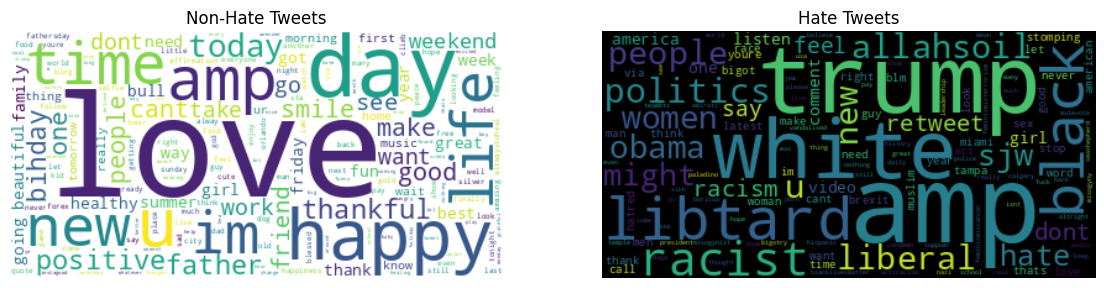

In [117]:
fig, axs = plt.subplots(1,2 , figsize=(14,8))

# prepare the text data
non_hate = " ".join(speech['nostop_tweet'][speech['label'] == 0])
hate = " ".join(speech['nostop_tweet'][speech['label'] == 1])

# Word cloud for non-hate tweets
nonhate_cloud = WordCloud(collocations = False, background_color = 'white').generate(non_hate)
axs[0].imshow(nonhate_cloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Tweets')

# Word cloud for hate tweets
hate_cloud = WordCloud(collocations = False, background_color = 'black').generate(hate)
axs[1].imshow(hate_cloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Tweets')

plt.show()

## 3.5 Check total number of hate speech and non-hate speech

In [122]:
speech['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

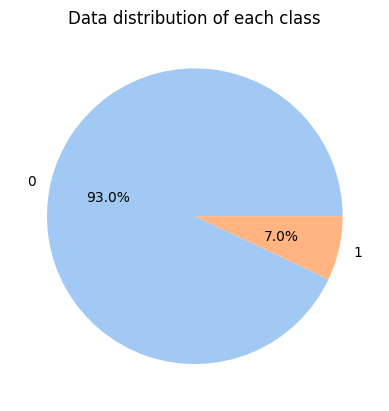

In [132]:
data = speech['label'].value_counts()

fig, ax = plt.subplots()
ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

# Set title and display
ax.set_title('Data distribution of each class')
plt.show()

It is obvious that the dataset is imbalanced, there are far more non-hate tweets than hate tweets. To solve this problem, we can resample hate speech samples with replacements (duplicate minority samples) to increasing the number of samples of hate tweets (label = 1).

## 3.6 Solve the imbalance issue

In [125]:
df_nohate = speech[speech.label == 0]
df_hate = speech[speech.label == 1]

# Upsample minority class
df_hate_upsampled = resample(df_hate,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_nohate),    # match number in majority class
                                 random_state=123)

# Combine non-hate tweet with upsampled hate tweet
speech_new = pd.concat([df_nohate, df_hate_upsampled])

# Display new class counts
print(speech_new['label'].value_counts())

label
0    29720
1    29720
Name: count, dtype: int64


In [128]:
speech_new.isnull().sum()

id                   0
label                0
tweet                0
nostop_tweet         0
tokenized_tweet      0
tweet_clean_words    0
dtype: int64

Now we have the same number of samples in each label, and there is no missing value in the dataset.